# 한국은행 의사록 어조 분석

이제 극성사전이 완성되었으므로, 이를 이용해 한국은행 의사록의 어조(tone)을 측정하도록 한다. 

우선 각 일자의 한국은행 의사록을 `sentences`로 분리한 뒤, 각 `sentences`를 다시 `ngrams`로 분리한다. 

문장별로 추출한 `ngrams`를 바탕으로 각 문장의 `tone_sentence`를 계산한다. 

문장별 `tone_sentence`가 계산됐으면, 문장을 다시 합쳐 문서(의사록)의 `tone_doc`을 구한다. 

한 날짜에는 한 문서가 있고, 따라서 한 `tone_doc`이 있으므로, 이제 이 데이터를 바탕으로 한국은행 기준금리 데이터와의 상관관계와 그래프를 확인한다. 

In [2]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import multiprocessing as mp

import preprocessing_mp_worker as worker

## 의사록 데이터를 불러온다. 

<font style='color:red;'>TODO: 의사로 전체의 내용에서 문장을 분리하는 것은 잘못됐다. 섹션 2,3에 대해서만 문장을 분리하여 tone을 분석하는 것이 논리적으로 맞다. 수정해야 함.  </font>

In [82]:
minutes_df = pd.read_pickle('./data_files/BOK_minutes/pkl/minutes_ngram.pkl')
minutes_df = minutes_df[['date', 'minutes']]
minutes_df.head()

,date,minutes
0,2005-06-09,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
1,2005-06-23,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
2,2005-07-07,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
3,2005-08-11,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
4,2005-09-08,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...


## 각 의사록(`minutes`)을 문장(`sentences`)들로 분리한다. 

In [83]:
%%time

minutes_df.loc[:, 'sentences'] = minutes_df.minutes.map(lambda x: worker.tidy_sentences(x)[0])

Wall time: 751 ms


In [84]:
minutes_df = minutes_df.explode('sentences')
minutes_df.head()

,date,minutes,sentences
0,2005-06-09,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,130.1...
0,2005-06-09,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,5. 참 여 자 이 상 용 감사 정 규 영 ...
0,2005-06-09,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"(３) 위원 토의내용 ｢국내외 경제동향｣과 관련하여, 일부 위원은 최근 소비..."
0,2005-06-09,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,동 위원은 서울 강남에서 시작된 부동산가격 상승이 다른 지역으로 확산될 기미가 ...
0,2005-06-09,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,또한 동 위원은 정부가 여러 차례에 걸쳐 부동산시장 안정대책을 내놓았음.


In [85]:
minutes_df.dropna(inplace=True) # sentences가 np.nan이라서 float으로 들어가 오류나는 경우 존재한다. 
minutes_df.date = pd.to_datetime(minutes_df.date)
minutes_df.reset_index(drop=True, inplace=True)

In [86]:
len(minutes_df)

42661

In [87]:
minutes_df.describe()

,date,minutes,sentences
count,42661,42661,42661
unique,297,297,41345
top,2018-10-18 00:00:00,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,다.
freq,451,451,231
first,2005-06-09 00:00:00,NaN,NaN
last,2020-01-17 00:00:00,NaN,NaN


In [88]:
minutes_df.head()

,date,minutes,sentences
0,2005-06-09,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,130.1...
1,2005-06-09,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,5. 참 여 자 이 상 용 감사 정 규 영 ...
2,2005-06-09,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"(３) 위원 토의내용 ｢국내외 경제동향｣과 관련하여, 일부 위원은 최근 소비..."
3,2005-06-09,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,동 위원은 서울 강남에서 시작된 부동산가격 상승이 다른 지역으로 확산될 기미가 ...
4,2005-06-09,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,또한 동 위원은 정부가 여러 차례에 걸쳐 부동산시장 안정대책을 내놓았음.


## 각 문장을 `ngrams`로 분리한다. 

In [34]:
%%time # Wall time: 42min 39s

with mp.Pool(processes=6) as p:
    minutes_sentences_ngrams = p.map(worker.text2ngram, minutes_df.sentences)

Wall time: 42min 39s


In [35]:
len(minutes_sentences_ngrams)

42661

## Polarity Dictionary를 불러온다. 

그리고 hawkish_dictionary와 dovish_dictionary로 나눈다. 

In [39]:
polarity_dictionary = pd.read_pickle('./data_files/results/polarity_dictionary_1.3threshold.pkl')
polarity_dictionary.head()

,hawkish,dovish,total,prob_feature_given_hawkish,prob_feature_given_dovish,polarity_score
이변/NNG,9,7,16,0.000008,0.000005,1.556266
지신/NNG,12,8,20,0.000010,0.000006,1.815644
그렉시트/NNG,17,34,51,0.000014,0.000024,0.605215
실험/NNG,19,9,28,0.000016,0.000006,2.555350
자산배분전략/NNG,10,102,112,0.000008,0.000071,0.118670


In [43]:
intensity_threshold = 1.3

hawkish_dictionary = polarity_dictionary[polarity_dictionary.polarity_score >= intensity_threshold]
hawkish_dictionary = hawkish_dictionary.index

dovish_dictionary = polarity_dictionary[polarity_dictionary.polarity_score <= 1/intensity_threshold]
dovish_dictionary = dovish_dictionary.index

## 각 문장의 tone을 구한다. 

In [48]:
def sentence_tone(sentence_ngram_list):
    hawkish_count = 0
    dovish_count = 0
    
    for ngram in sentence_ngram_list:
        if ngram in hawkish_dictionary:
            hawkish_count += 1
        elif ngram in dovish_dictionary:
            dovish_count += 1
        else:
            continue
    
    if (hawkish_count + dovish_count) == 0:
        return np.nan
    
    sentence_tone = (hawkish_count - dovish_count) / (hawkish_count + dovish_count)
    
    return sentence_tone

In [49]:
sentence_tone_list = [sentence_tone(ngram_list) for ngram_list in minutes_sentences_ngrams]
len(sentence_tone_list)

42661

In [95]:
sentence_tone_df = pd.DataFrame(sentence_tone_list, columns=['sentence_tone'])
minutes_df_tone = pd.concat([minutes_df, sentence_tone_df], axis=1)

In [109]:
minutes_df_tone.to_pickle('./data_files/results/minutes_df_sentence_tone.pkl')

## 문서의 tone을 구한다. 

`.groupby('date')`를 했다. 한 날짜에 의사록이 하나 올라온다 가정. 

In [108]:
minutes_df_tone_by_date = minutes_df_tone.groupby('date')['sentence_tone'].sum()
minutes_df_tone_by_date = pd.DataFrame({'doc_tone': minutes_df_tone_by_date.values}, index=minutes_df_tone_by_date.index)
minutes_df_tone_by_date.head()

,doc_tone
date,
2005-06-09,52.590981
2005-06-23,-1.663781
2005-07-07,45.713487
2005-08-11,70.147718
2005-09-08,38.087451


In [110]:
minutes_df_tone_by_date.to_pickle('./data_files/results/minutes_df_document_tone.pkl')

## 한국은행 기준금리 데이터를 불러와 합친다. 

In [2]:
minutes_df_tone_by_date = pd.read_pickle('./data_files/results/minutes_df_document_tone.pkl')
minutes_df_tone_by_date.head()

,doc_tone
date,
2005-06-09,52.590981
2005-06-23,-1.663781
2005-07-07,45.713487
2005-08-11,70.147718
2005-09-08,38.087451


In [3]:
bok_policy_rate = pd.read_csv('./data_files/BOK_2.6._base_rate.csv')
bok_policy_rate.date = pd.to_datetime(bok_policy_rate.date)
bok_policy_rate.set_index('date', inplace=True)
bok_policy_rate.head()

,base_rate
date,
2004-01-01,3.75
2004-01-02,3.75
2004-01-03,3.75
2004-01-04,3.75
2004-01-05,3.75


In [4]:
tone_and_policy_rate_df = minutes_df_tone_by_date.merge(bok_policy_rate, how='left', left_index=True, right_index=True)
tone_and_policy_rate_df.head()

,doc_tone,base_rate
date,,
2005-06-09,52.590981,3.25
2005-06-23,-1.663781,3.25
2005-07-07,45.713487,3.25
2005-08-11,70.147718,3.25
2005-09-08,38.087451,3.25


In [15]:
tone_and_policy_rate_df.to_pickle('./data_files/results/tone_and_policy_rate_df.pkl')

## 상관관계 계산 및 그래프 plot

In [5]:
tone_and_policy_rate_df.corr(method='pearson')

,doc_tone,base_rate
doc_tone,1.000000,0.532323
base_rate,0.532323,1.000000


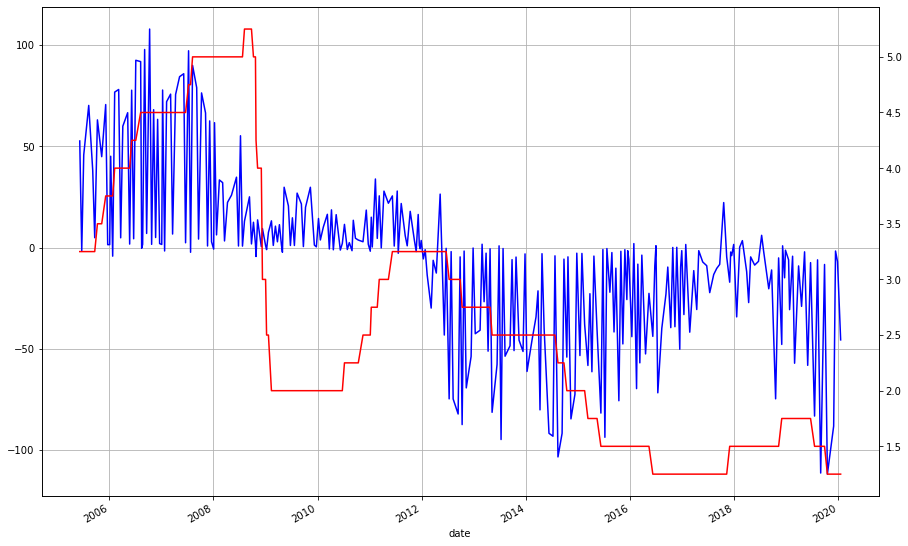

In [14]:
plt.figure(figsize=(15,10))

ax1 = tone_and_policy_rate_df.doc_tone.plot(color='blue', grid=True, label='금통위 의사록 어조')
ax2 = tone_and_policy_rate_df.base_rate.plot(color='red', grid=True, secondary_y=True, label='기준금리')

plt.show()